# Supervised Machine Learning
## Final Project: Decision Trees vs. Support Vector Machines
Gagandeep Singh

In [155]:
# Import standard libraries
import numpy as np
import pandas as pd

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn libraries for model training and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error
)

# Scikit-learn library for dimensionality reduction
from sklearn.decomposition import PCA

# Libraries for plotting DecisionTreeClassifier
import pydotplus
import graphviz
from IPython.display import Image
from sklearn.tree import export_graphviz

# Ignore warnings during model training (SVM, etc.)
import warnings
from sklearn.exceptions import ConvergenceWarning

# Filter out specific warnings (ConvergenceWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Defining color-palette for visualizations
color_palette = "RdBu"


In [156]:
# Function to check for errors and the classification report for the models.
def get_metrics(clf, X, y):
    preds = clf.predict(X)
    print("Confusion Matrix:\n", confusion_matrix(y, preds), end='\n\n')
    print("Accuracy:             ", accuracy_score(y, preds), end='\n\n')
    print("Mean Squared Error:   ", mean_squared_error(y, preds), end='\n\n')
    print("Mean Absolute Error:  ", mean_absolute_error(y, preds), end='\n\n')
    print("classification report:")
    print(classification_report(y, preds)) 

In [157]:
def display_tree(model, feature_names, file_name="Tree"):
    """
    Plot a decision tree using graphviz.

    Parameters:
    model (DecisionTreeClassifier): Trained decision tree model.
    """
    dot_data = export_graphviz(
        model,
        filled=True,
        rounded=True,
        special_characters=True,
        rotate=True,
        proportion=True,
        feature_names=feature_names,
        class_names=['satisfied', 'not satisfied']
    )
    graph = graphviz.Source(dot_data)
    
    # Render and save the graph
    graph.render('/'.join(["images", file_name]), format='png')
    return graph

# Model Selection and Training

In [158]:
# import the data
data = pd.read_csv("data/cleaned_data.csv")

Let's start with spliting our data first.

In [159]:
# Split the data into features and label
X = data.drop('satisfaction_enc', axis=1)
y = data['satisfaction_enc']

# Split the data into train, validation and test set.
# train     ~70%
# validation~15%
# test      ~15%
X_train, X_test, y_train, y_test = train_test_split(X, y
                                                    , test_size=0.3
                                                    , random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test
                                                    , test_size=0.5
                                                    , random_state=42)

In [160]:
# confirming the splits with shapes
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((90916, 23), (90916,), (19482, 23), (19482,), (19482, 23), (19482,))

## Decision Tree
I'll use GridSearchCV to find the best parameters for our application

In [161]:
# cread DecisionTreeClassifier object
dt = DecisionTreeClassifier()

### First decision Tree

In [162]:
# The parameters that I would test on the model
param_grid = {'max_depth': [5, 6, 7, 8, 10, None],
             'criterion': ['gini', 'entropy'],
             'ccp_alpha':[0.0001, 0.0002, 0.0003]}

# implimentin GridSearchCV
clf = GridSearchCV(dt,
                   param_grid=param_grid,
                   verbose=0,
                   n_jobs=-1)

In [163]:
# fitting the model to train set
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0001, 0.0002, 0.0003],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 10, None]})

In [164]:
# the parameters that gave the best results. 
clf.best_params_

{'ccp_alpha': 0.0001, 'criterion': 'entropy', 'max_depth': None}

In [165]:
# Creating a DecisionTreeClassifier with the best parameters and fitting it
clf_best = DecisionTreeClassifier(**clf.best_params_, random_state=42)
clf_best.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', random_state=42)

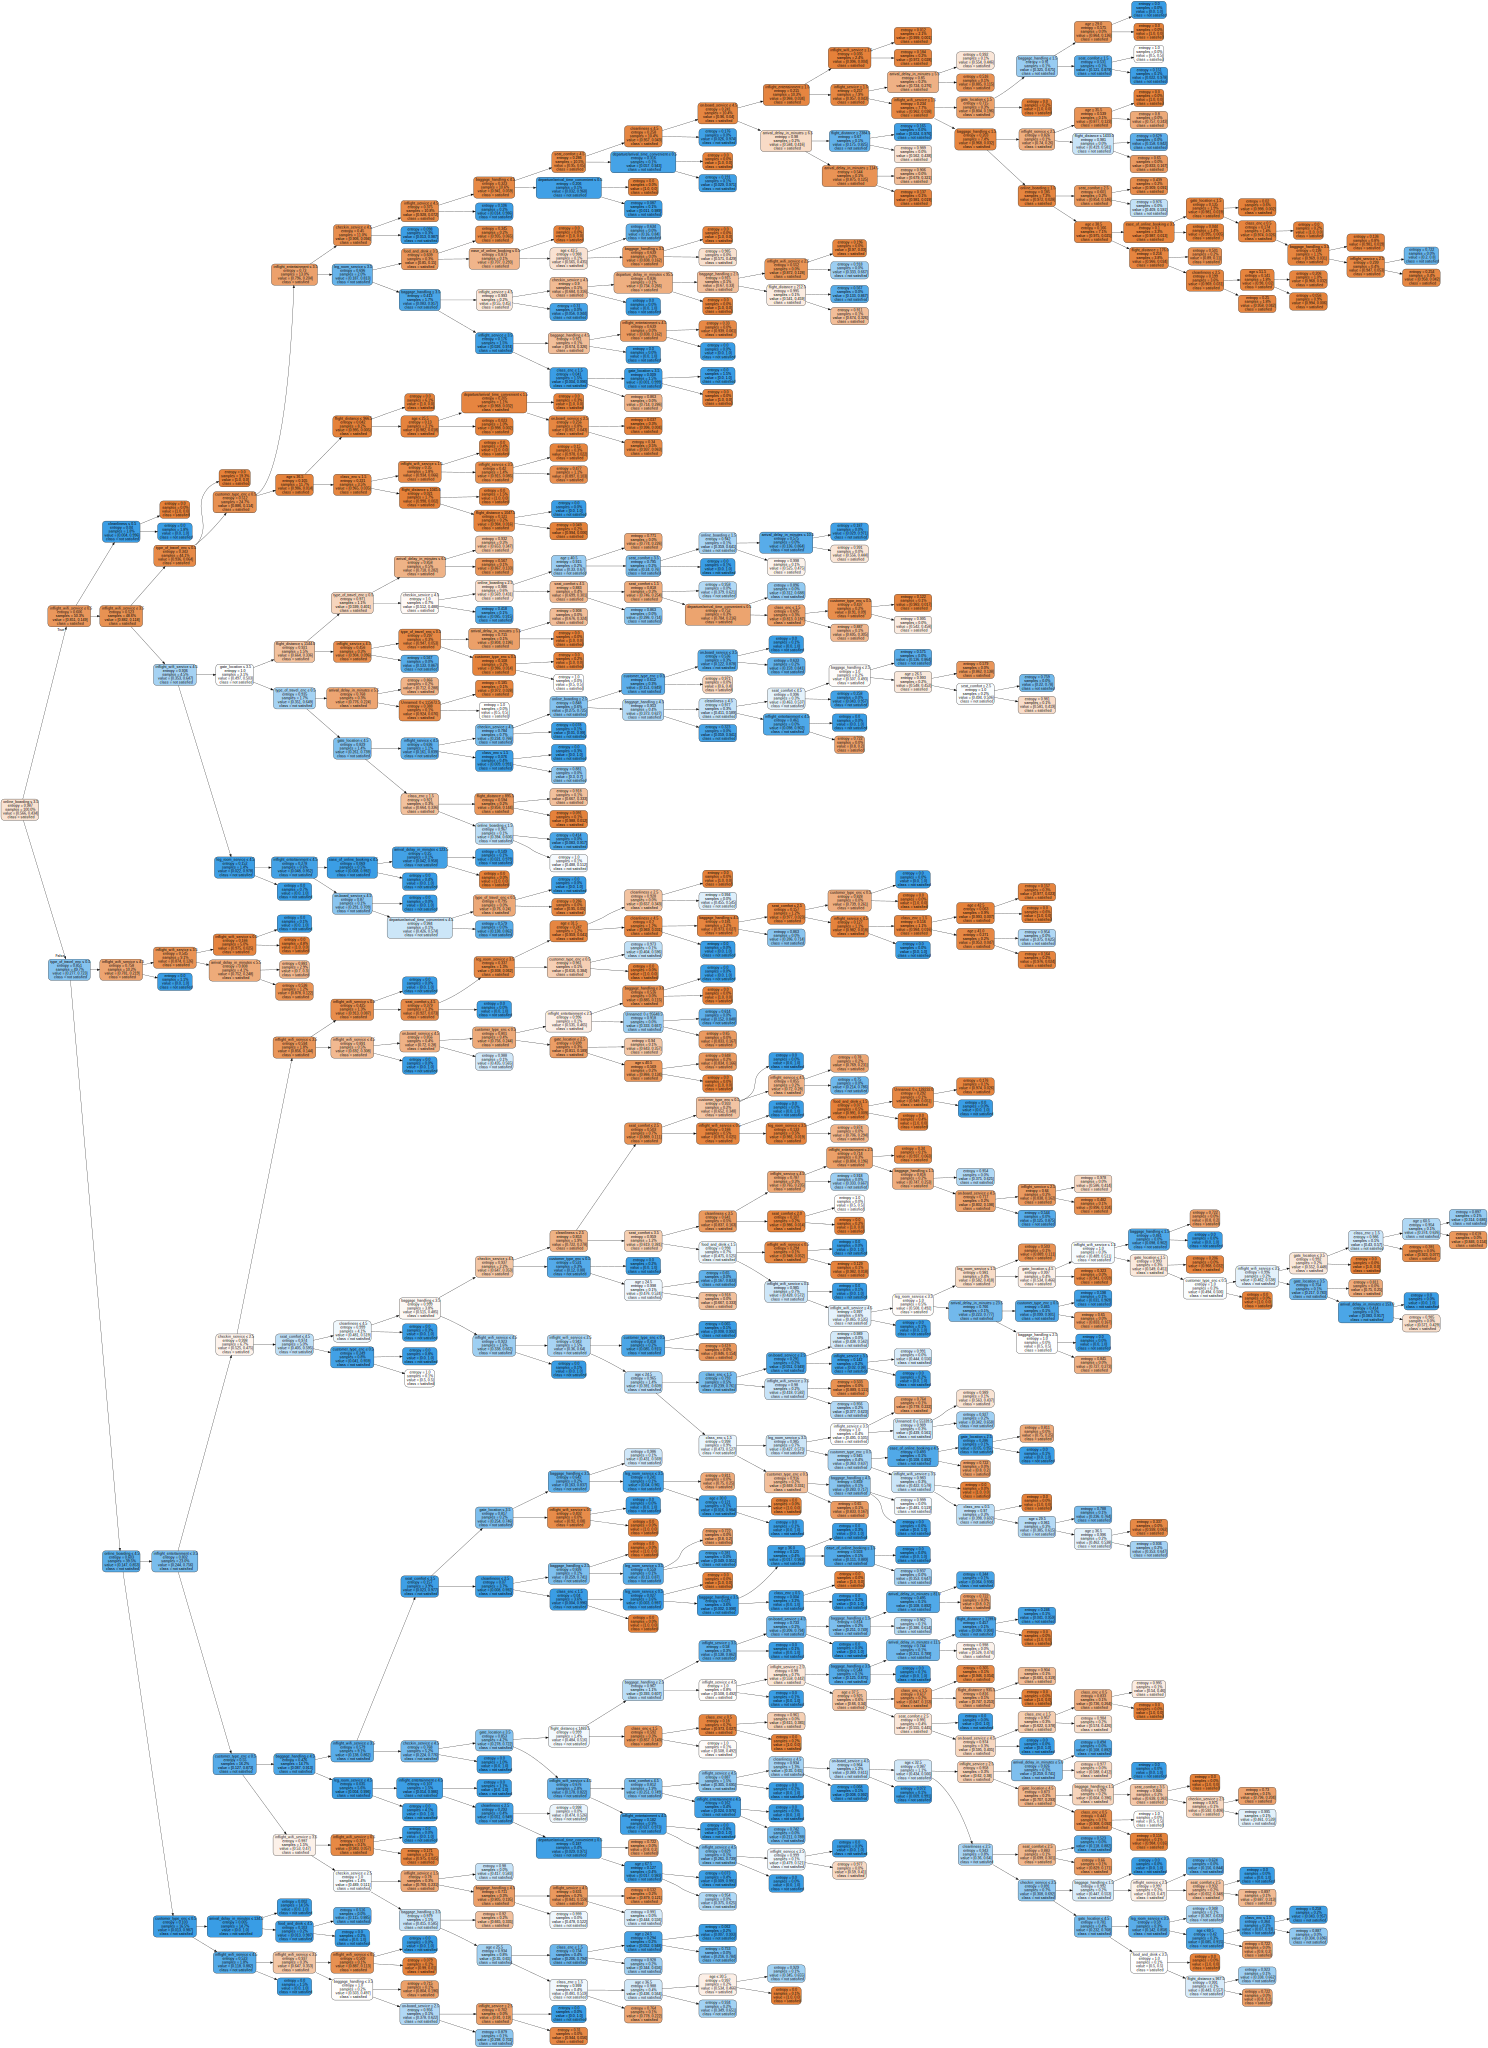

In [166]:
# plotting the model with best parameters
display_tree(clf_best, X_train.columns, file_name="Tree_1")

In [172]:
# looking at the performance of the model.
get_metrics(clf_best, X_valid, y_valid)

Confusion Matrix:
 [[10636   256]
 [  593  7997]]

Accuracy:              0.9564213119802895

Mean Squared Error:    0.0435786880197105

Mean Absolute Error:   0.0435786880197105

classification report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     10892
           1       0.97      0.93      0.95      8590

    accuracy                           0.96     19482
   macro avg       0.96      0.95      0.96     19482
weighted avg       0.96      0.96      0.96     19482



Using the same method to find a second best model

### Second decision Tree

In [173]:
# The parameters that I would test on the model
param_grid_2 = {'max_depth': [5, 6, 7, 8, 10],
             'criterion': ['gini'],
             'ccp_alpha':[0.0002, 0.0003]}

# implimentin GridSearchCV
clf_2 = GridSearchCV(dt,
                   param_grid=param_grid_2,
                   verbose=3,
                   n_jobs=-1)

In [174]:
clf_2.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0002, 0.0003], 'criterion': ['gini'],
                         'max_depth': [5, 6, 7, 8, 10]},
             verbose=3)

In [175]:
clf_2.best_params_

{'ccp_alpha': 0.0002, 'criterion': 'gini', 'max_depth': 10}

In [176]:
clf_2_best = DecisionTreeClassifier(**clf_2.best_params_, random_state=42)

In [177]:
clf_2_best.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0002, max_depth=10, random_state=42)

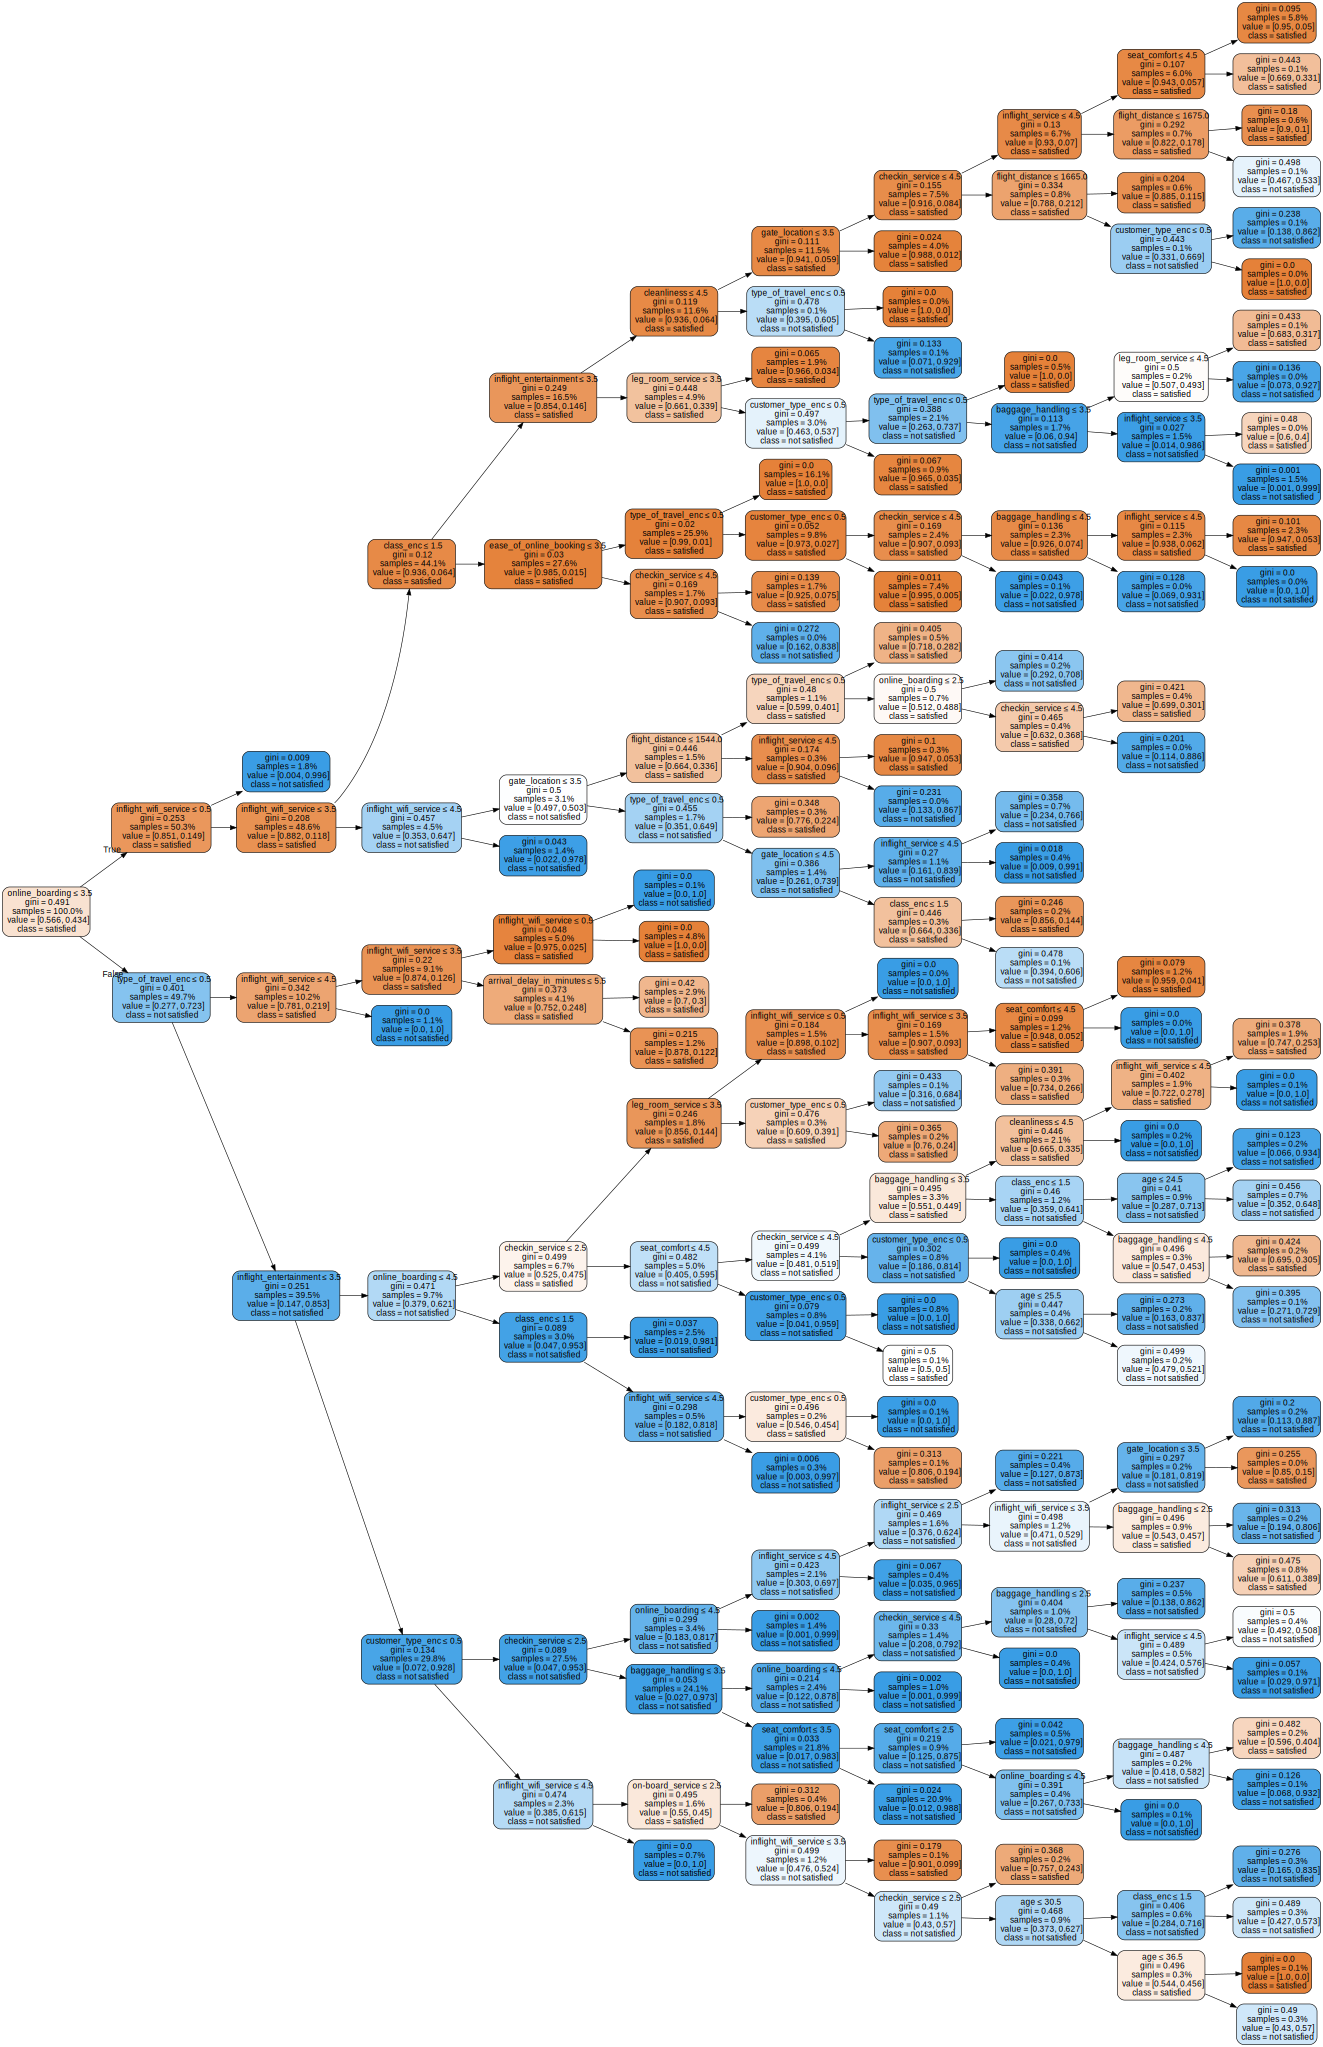

In [178]:
# plotting the model with best parameters
display_tree(clf_2_best, X_train.columns, file_name="Tree_2")

In [179]:
# evaluating the model using some metrics
get_metrics(clf_2_best, X_valid, y_valid)

Confusion Matrix:
 [[10513   379]
 [  776  7814]]

Accuracy:              0.940714505697567

Mean Squared Error:    0.05928549430243302

Mean Absolute Error:   0.05928549430243302

classification report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10892
           1       0.95      0.91      0.93      8590

    accuracy                           0.94     19482
   macro avg       0.94      0.94      0.94     19482
weighted avg       0.94      0.94      0.94     19482



## SVM: Support Vector Machine

In [180]:
# import the data
data = pd.read_csv("data/cleaned_data.csv")

In [181]:
svm = SVC()

To train the SVM model, I will first reduce the size of our dataset. 

In [182]:
# Split the data into features and label
X = data.drop('satisfaction_enc', axis=1)
y = data['satisfaction_enc']

# Split the data into train, validation and test set
X, _, y, _t = train_test_split(X, y
                             , test_size=0.90
                             , random_state=42)
# Scaling the data for Support Vector Machine
scaler = MinMaxScaler()
X = scaler.fit_transform(X, y)

# Split the reduced & scaled data into train, validation and test sets
# trian ~ 70%
# validation ~ 15%
# test ~ 15%

X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(X, y
                                                  , test_size=0.3
                                                  , random_state=42)

X_test_rs, X_valid_rs, y_test_rs, y_valid_rs = train_test_split(X, y
                                                  , test_size=0.5
                                                  , random_state=42)

X_train_rs.shape, X_test_rs.shape, X_valid_rs.shape, y_train_rs.shape, y_test_rs.shape, y_valid_rs.shape

((9091, 23), (6494, 23), (6494, 23), (9091,), (6494,), (6494,))

### finding the best model using GridSearchCV

In [183]:
svm_params = {'kernel': ['rbf'],
             'C': np.logspace(-2, 10, 8),
             'gamma': np.logspace(-9, 3, 8),
             'max_iter': range(100, 500, 100)}

clf = GridSearchCV(svm,
                   param_grid=svm_params,
                   n_jobs=-1,
                   verbose=0)

In [184]:
clf.fit(X_train_rs, y_train_rs) 

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-02, 5.17947468e-01, 2.68269580e+01, 1.38949549e+03,
       7.19685673e+04, 3.72759372e+06, 1.93069773e+08, 1.00000000e+10]),
                         'gamma': array([1.00000000e-09, 5.17947468e-08, 2.68269580e-06, 1.38949549e-04,
       7.19685673e-03, 3.72759372e-01, 1.93069773e+01, 1.00000000e+03]),
                         'kernel': ['rbf'], 'max_iter': range(100, 500, 100)})

In [185]:
clf.best_params_

{'C': 0.517947467923121,
 'gamma': 0.3727593720314938,
 'kernel': 'rbf',
 'max_iter': 400}

In [186]:
svm_best = SVC(**clf.best_params_, random_state=42)

In [187]:
svm_best.fit(X_train_rs, y_train_rs) 

SVC(C=0.517947467923121, gamma=0.3727593720314938, max_iter=400,
    random_state=42)

In [188]:
# evaluating the model using some metrics
get_metrics(svm_best, X_valid_rs, y_valid_rs)

Confusion Matrix:
 [[3145  584]
 [ 231 2534]]

Accuracy:              0.8744995380351094

Mean Squared Error:    0.12550046196489067

Mean Absolute Error:   0.12550046196489067

classification report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.89      3729
           1       0.81      0.92      0.86      2765

    accuracy                           0.87      6494
   macro avg       0.87      0.88      0.87      6494
weighted avg       0.88      0.87      0.88      6494



## Finding the second best model

In [189]:
svm_params = {'kernel': ['poly'],
             'C': np.logspace(-2, 10, 8),
             'degree': range(1, 5),
             'max_iter': range(100, 500, 100)}

clf = GridSearchCV(svm,
                   param_grid=svm_params,
                   n_jobs=-1,
                  return_train_score=True)

In [190]:
clf.fit(X_train_rs, y_train_rs) 

/Users/gagandeepsingh/anaconda3/envs/UML/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/Users/gagandeepsingh/anaconda3/envs/UML/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/Users/gagandeepsingh/anaconda3/envs/UML/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/Users/gagandeepsingh/anaconda3/envs/UML/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/Use

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-02, 5.17947468e-01, 2.68269580e+01, 1.38949549e+03,
       7.19685673e+04, 3.72759372e+06, 1.93069773e+08, 1.00000000e+10]),
                         'degree': range(1, 5), 'kernel': ['poly'],
                         'max_iter': range(100, 500, 100)},
             return_train_score=True)

In [191]:
clf.best_params_

{'C': 1389.4954943731361, 'degree': 1, 'kernel': 'poly', 'max_iter': 300}

In [192]:
svm_best_2 = SVC(**clf.best_params_, random_state=42)

In [193]:
svm_best_2.fit(X_train_rs, y_train_rs)

SVC(C=1389.4954943731361, degree=1, kernel='poly', max_iter=300,
    random_state=42)

In [194]:
get_metrics(svm_best_2, X_valid_rs, y_valid_rs)

Confusion Matrix:
 [[2093 1636]
 [ 949 1816]]

Accuracy:              0.6019402525408069

Mean Squared Error:    0.3980597474591931

Mean Absolute Error:   0.3980597474591931

classification report:
              precision    recall  f1-score   support

           0       0.69      0.56      0.62      3729
           1       0.53      0.66      0.58      2765

    accuracy                           0.60      6494
   macro avg       0.61      0.61      0.60      6494
weighted avg       0.62      0.60      0.60      6494



### Comparing the two best models for Decision Tree and SVM

#### Decision Tree

In [195]:
print("\n"+"Decision Tree".center(60))
print("\nPerformance on the Train Set:")
print("-------------------------------")
get_metrics(clf_best, X_train, y_train)

print("\nPerformance on the Validation Set:")
print("----------------------------------")
get_metrics(clf_best, X_valid, y_valid)


                       Decision Tree                        

Performance on the Train Set:
-------------------------------
Confusion Matrix:
 [[50509   964]
 [ 2438 37005]]

Accuracy:              0.962580843855867

Mean Squared Error:    0.03741915614413305

Mean Absolute Error:   0.03741915614413305

classification report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     51473
           1       0.97      0.94      0.96     39443

    accuracy                           0.96     90916
   macro avg       0.96      0.96      0.96     90916
weighted avg       0.96      0.96      0.96     90916


Performance on the Validation Set:
----------------------------------
Confusion Matrix:
 [[10636   256]
 [  593  7997]]

Accuracy:              0.9564213119802895

Mean Squared Error:    0.0435786880197105

Mean Absolute Error:   0.0435786880197105

classification report:
              precision    recall  f1-score   support

           0   

#### SVM

In [196]:
print("\n"+"SVM".center(60))
print("\nPerformance on the Train Set:")
print("-------------------------------")
get_metrics(svm_best, X_train_rs, y_train_rs)

print("\nPerformance on the Validation Set:")
print("----------------------------------")
get_metrics(svm_best, X_valid_rs, y_valid_rs)


                            SVM                             

Performance on the Train Set:
-------------------------------
Confusion Matrix:
 [[4374  801]
 [ 275 3641]]

Accuracy:              0.8816411835881641

Mean Squared Error:    0.11835881641183588

Mean Absolute Error:   0.11835881641183588

classification report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      5175
           1       0.82      0.93      0.87      3916

    accuracy                           0.88      9091
   macro avg       0.88      0.89      0.88      9091
weighted avg       0.89      0.88      0.88      9091


Performance on the Validation Set:
----------------------------------
Confusion Matrix:
 [[3145  584]
 [ 231 2534]]

Accuracy:              0.8744995380351094

Mean Squared Error:    0.12550046196489067

Mean Absolute Error:   0.12550046196489067

classification report:
              precision    recall  f1-score   support

           0       0

Looking at the performance of both the models on the train and validation sets, Decision Tree is clearly the best out of the two. It has similar performance on the train and validation set with the accuracy of over 95%.

Now let's check the model's performance on the test set.

#### Best Decision Tree on test set

In [197]:
get_metrics(clf_best, X_test, y_test)

Confusion Matrix:
 [[10828   259]
 [  579  7816]]

Accuracy:              0.9569859357355508

Mean Squared Error:    0.04301406426444924

Mean Absolute Error:   0.04301406426444924

classification report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     11087
           1       0.97      0.93      0.95      8395

    accuracy                           0.96     19482
   macro avg       0.96      0.95      0.96     19482
weighted avg       0.96      0.96      0.96     19482

